In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pathlib
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing.image import load_img, img_to_array

data_root_orig = tf.keras.utils.get_file(origin='https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz',
                                         fname='notMNIST_small', untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

/home/maxim/.keras/datasets/notMNIST_small


 Загрузим данные в память и отобразим их

In [2]:
for letter_dir in data_root.iterdir():
  print(letter_dir)

/home/maxim/.keras/datasets/notMNIST_small/F
/home/maxim/.keras/datasets/notMNIST_small/B
/home/maxim/.keras/datasets/notMNIST_small/H
/home/maxim/.keras/datasets/notMNIST_small/G
/home/maxim/.keras/datasets/notMNIST_small/D
/home/maxim/.keras/datasets/notMNIST_small/I
/home/maxim/.keras/datasets/notMNIST_small/C
/home/maxim/.keras/datasets/notMNIST_small/A
/home/maxim/.keras/datasets/notMNIST_small/J
/home/maxim/.keras/datasets/notMNIST_small/E


In [3]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

18724

Выведем несколько случайных изображений

In [4]:
all_image_paths[:10]

import IPython.display as display

for n in range(5):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(image_path)

/home/maxim/.keras/datasets/notMNIST_small/J/Q2l0YWRlbC1JbmxpbmUub3Rm.png


/home/maxim/.keras/datasets/notMNIST_small/J/QmFpbGV5U2Fuc0lUQ1N0ZC1Cb2xkLm90Zg==.png


/home/maxim/.keras/datasets/notMNIST_small/D/RWlkZXRpY01vZGVybi1JdGFsaWMub3Rm.png


/home/maxim/.keras/datasets/notMNIST_small/H/Q29tcGFjdGFTdGQtQm9sZC5vdGY=.png


/home/maxim/.keras/datasets/notMNIST_small/F/Rm9saW9JQ0ctTGlnaHQub3Rm.png


In [5]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [6]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

In [7]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])
print("First 10 paths: ", all_image_paths[:10])

First 10 labels indices:  [5, 1, 1, 0, 2, 7, 2, 9, 1, 1]
First 10 paths:  ['/home/maxim/.keras/datasets/notMNIST_small/F/Rmx5ZXIgTFQgRXh0cmEgQmxhY2sgQ29uZGVuc2VkLnR0Zg==.png', '/home/maxim/.keras/datasets/notMNIST_small/B/R2lsbFNhbnNDRS1JdGFsaWMub3Rm.png', '/home/maxim/.keras/datasets/notMNIST_small/B/QnJvYWR3YXlQLnR0Zg==.png', '/home/maxim/.keras/datasets/notMNIST_small/A/R291ZHlIZWF2eWZhY2VCVC1SZWd1bGFyQ29uZC5vdGY=.png', '/home/maxim/.keras/datasets/notMNIST_small/C/QW50aXF1YSAxMDEgQ29uZGVuc2VkIEl0YWxpYy50dGY=.png', '/home/maxim/.keras/datasets/notMNIST_small/H/Q2VudHVyeU9sZFN0eWxlU3RkLVJlZ3VsYXIub3Rm.png', '/home/maxim/.keras/datasets/notMNIST_small/C/QUdSZXZ1ZUN5ciBSb21hbiBNZWRpdW0udHRm.png', '/home/maxim/.keras/datasets/notMNIST_small/J/Qm9kb25pQmF1ZXJCUS1SZWd1bGFyLm90Zg==.png', '/home/maxim/.keras/datasets/notMNIST_small/B/RGFudGVNVFN0ZC1NZWRpdW1JdGFsaWMub3Rm.png', '/home/maxim/.keras/datasets/notMNIST_small/B/Q29lcmNpb25OYWtlZC50dGY=.png']


Создадим flow изображений, предварительно выбрав деление на обучающую и валидационные выборки

In [8]:
VALIDATION_SET_RATE = 0.05

# define image generators for train, validation and test set
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
#     shear_range=0.4,
#     zoom_range=0.4,
#     horizontal_flip=True,
    validation_split=VALIDATION_SET_RATE
)

BATCH_SIZE = 32
IMG_HEIGHT = 28
IMG_WIDTH = 28
IMG_CHANNELS = 3
EPOCHS_COUNT = 20



train_data_gen = image_generator.flow_from_directory(directory=str(data_root),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     subset='training')
STEPS_PER_EPOCH_TRAIN = np.ceil(train_data_gen.samples/BATCH_SIZE)

validation_data_gen = image_generator.flow_from_directory(directory=str(data_root),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     subset='validation')

STEPS_PER_EPOCH_VALIDATION = np.ceil(validation_data_gen.samples/BATCH_SIZE)

Found 17794 images belonging to 10 classes.
Found 930 images belonging to 10 classes.


Создадим модель нейронной сети представленной в виде полносвязных слоёв
Learning rate зададим динамическим
Для борьбы с переобучением будем использовать Dropout слой с параметром 0.1
В качестве функции активации для полносвязных слоёв - relu

In [9]:
model = keras.Sequential([
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax', name='output')
])
model.summary()

cbks = [tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.0224 * 0.5 ** (epoch // 1))]
    
# Compile model
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    validation_data=validation_data_gen,
    steps_per_epoch=STEPS_PER_EPOCH_TRAIN,
    validation_steps=STEPS_PER_EPOCH_VALIDATION,
    epochs=EPOCHS_COUNT,
    callbacks=cbks)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2352)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               301184    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 318,986
Trainable params: 318,986
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  


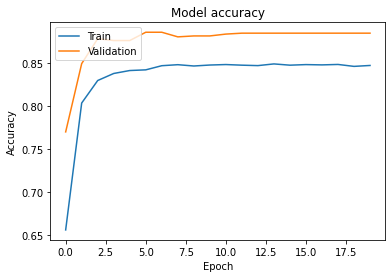

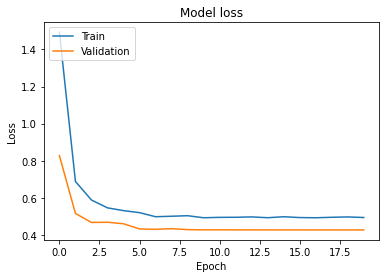

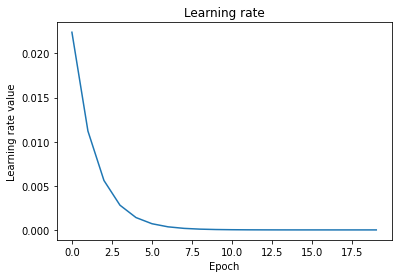

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['lr'])
plt.title('Learning rate')
plt.ylabel('Learning rate value')
plt.xlabel('Epoch')
plt.show()

Как видно из графиков - модель обучается довольно успешно, однако есть небольшие признаки переобучения, т.к. значения на валидационной выборке меньше, чем на обучающей. Возможно лучшим значением learning rate является значение где-то в районе 0.015, т.к. после уменьшения learning rate обучение модели начало замедляться и выходить на плато.

In [11]:
def load_image(filename, image_size):
    w, h = image_size
    # load the image
    img = load_img(filename, target_size=(w, h))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, w, h, 3)
    # center pixel data
    img = img.astype('float32')
    return img

img = load_image(str(data_root) + "/E/QmVhY2ggVGhpbiBCb2xkLnR0Zg==.png", (28, 28))

На обученной модели можно попробовать предсказать букву, пусть это будет латинская Е.

In [12]:
# lets predict E
model.predict(img)

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Как видно - модель со 100% вероятностью уверена, что это буква Е, такое точное значение получено по причине того, что данное изображение находится в обучающей выборке. Однако можно отметить, что общая "объективная" точность модели будет в районе 85%